100%|██████████| 170M/170M [00:03<00:00, 49.2MB/s] 
Epoch [1/300]: 100%|██████████| 391/391 [00:10<00:00, 38.36it/s, lossD=0.967, lossG=2.01]


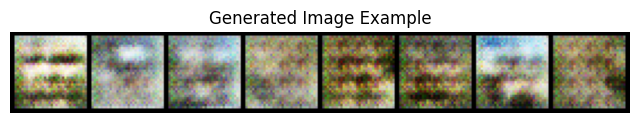

Epoch [10/300]: 100%|██████████| 391/391 [00:09<00:00, 41.45it/s, lossD=0.922, lossG=1.63]


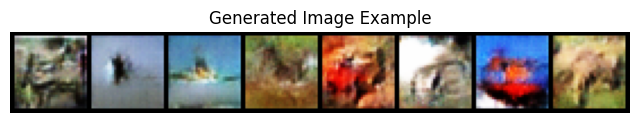

Epoch [20/300]: 100%|██████████| 391/391 [00:09<00:00, 41.26it/s, lossD=0.822, lossG=1.7] 


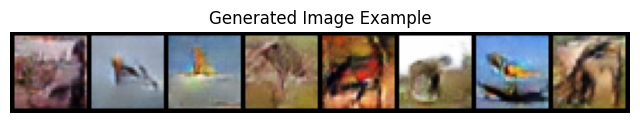

Epoch [30/300]: 100%|██████████| 391/391 [00:09<00:00, 40.87it/s, lossD=0.749, lossG=1.86]


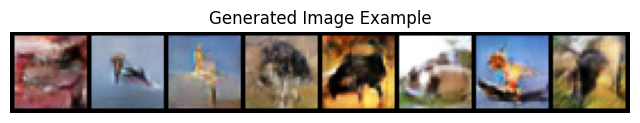

Epoch [40/300]: 100%|██████████| 391/391 [00:09<00:00, 40.48it/s, lossD=0.703, lossG=2.08]


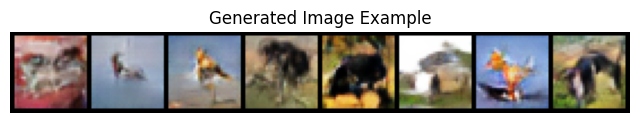

Epoch [50/300]: 100%|██████████| 391/391 [00:09<00:00, 40.90it/s, lossD=0.616, lossG=2.09]


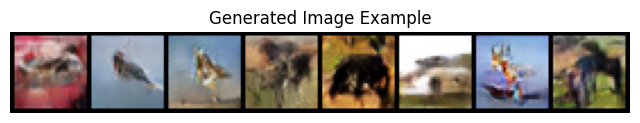

Epoch [60/300]: 100%|██████████| 391/391 [00:09<00:00, 41.30it/s, lossD=0.553, lossG=2.25]


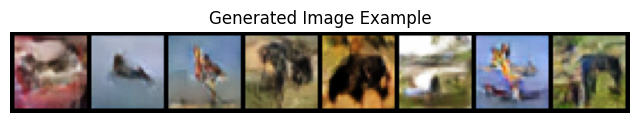

Epoch [70/300]: 100%|██████████| 391/391 [00:09<00:00, 40.86it/s, lossD=0.538, lossG=2.38]


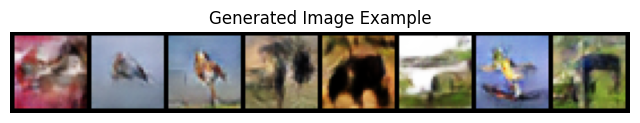

Epoch [80/300]: 100%|██████████| 391/391 [00:09<00:00, 41.09it/s, lossD=0.535, lossG=2.38]


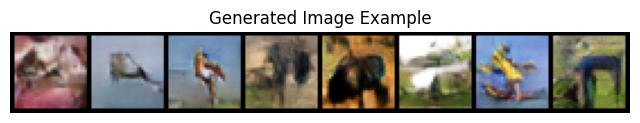

Epoch [90/300]: 100%|██████████| 391/391 [00:09<00:00, 40.62it/s, lossD=0.51, lossG=2.49] 


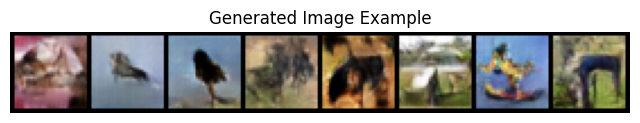

Epoch [100/300]: 100%|██████████| 391/391 [00:09<00:00, 39.84it/s, lossD=0.57, lossG=2.54] 


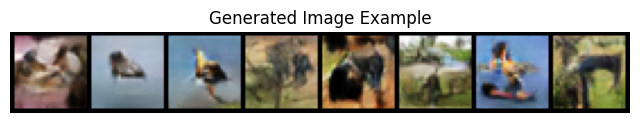

Epoch [110/300]: 100%|██████████| 391/391 [00:09<00:00, 41.05it/s, lossD=0.596, lossG=2.62]


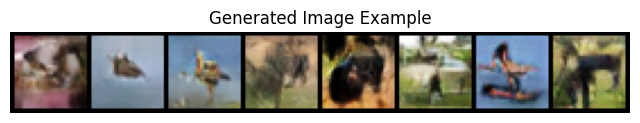

Epoch [120/300]: 100%|██████████| 391/391 [00:09<00:00, 41.13it/s, lossD=0.583, lossG=2.58]


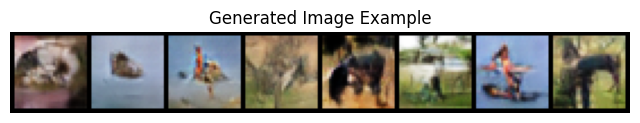

Epoch [130/300]: 100%|██████████| 391/391 [00:09<00:00, 41.13it/s, lossD=0.511, lossG=2.54]


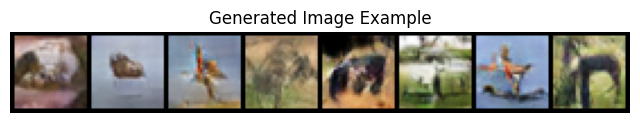

Epoch [140/300]: 100%|██████████| 391/391 [00:09<00:00, 41.62it/s, lossD=0.606, lossG=2.53]


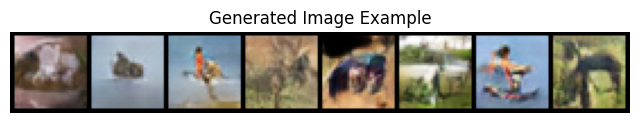

Epoch [150/300]: 100%|██████████| 391/391 [00:09<00:00, 41.00it/s, lossD=0.589, lossG=2.51]


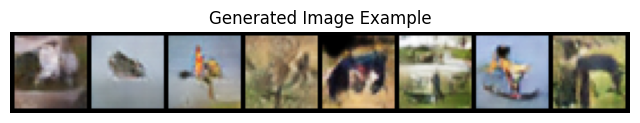

Epoch [160/300]: 100%|██████████| 391/391 [00:09<00:00, 40.81it/s, lossD=0.523, lossG=2.3] 


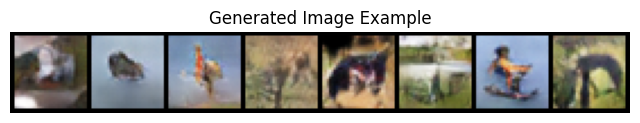

Epoch [170/300]: 100%|██████████| 391/391 [00:09<00:00, 41.35it/s, lossD=0.594, lossG=2.23]


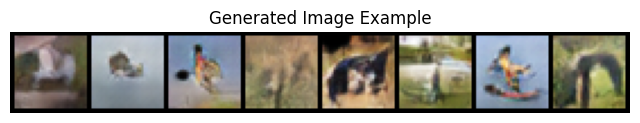

Epoch [180/300]: 100%|██████████| 391/391 [00:09<00:00, 41.42it/s, lossD=0.481, lossG=1.88]


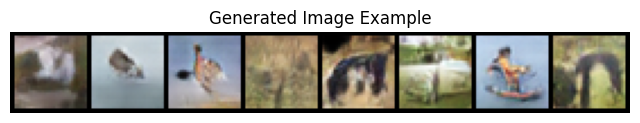

Epoch [190/300]: 100%|██████████| 391/391 [00:09<00:00, 42.04it/s, lossD=0.525, lossG=1.7] 


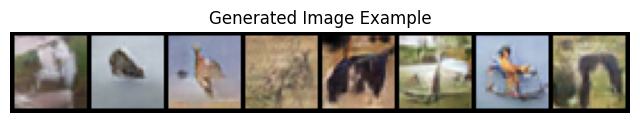

Epoch [200/300]: 100%|██████████| 391/391 [00:09<00:00, 41.95it/s, lossD=0.471, lossG=1.21]


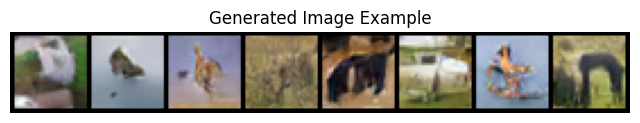

Epoch [210/300]: 100%|██████████| 391/391 [00:09<00:00, 41.58it/s, lossD=0.576, lossG=0.948]


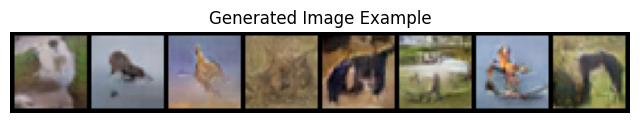

Epoch [220/300]: 100%|██████████| 391/391 [00:09<00:00, 41.12it/s, lossD=0.457, lossG=0.471]


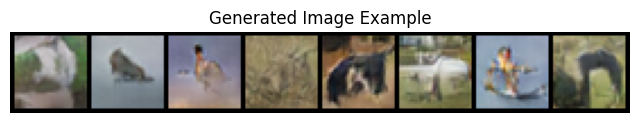

Epoch [230/300]: 100%|██████████| 391/391 [00:09<00:00, 41.13it/s, lossD=0.494, lossG=0.32] 


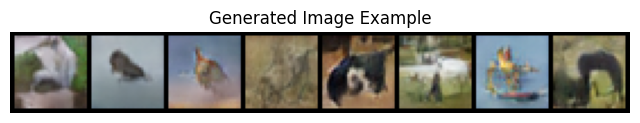

Epoch [240/300]: 100%|██████████| 391/391 [00:09<00:00, 40.55it/s, lossD=0.39, lossG=0.0814] 


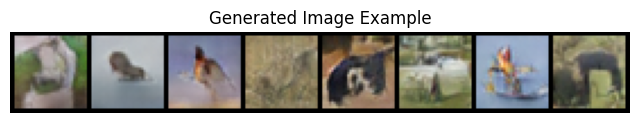

Epoch [250/300]: 100%|██████████| 391/391 [00:09<00:00, 41.36it/s, lossD=0.382, lossG=0.0551]


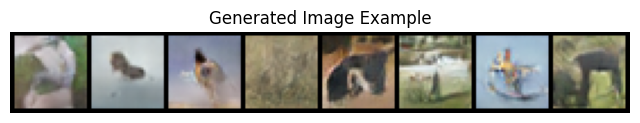

Epoch [260/300]: 100%|██████████| 391/391 [00:09<00:00, 41.61it/s, lossD=0.389, lossG=0.0736]


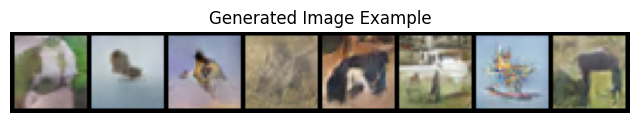

Epoch [270/300]: 100%|██████████| 391/391 [00:09<00:00, 41.24it/s, lossD=0.388, lossG=0.0671]


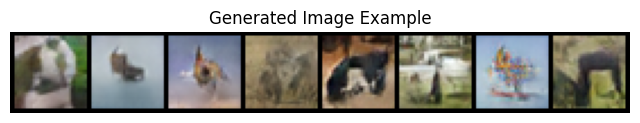

Epoch [280/300]: 100%|██████████| 391/391 [00:09<00:00, 41.15it/s, lossD=0.381, lossG=0.045] 


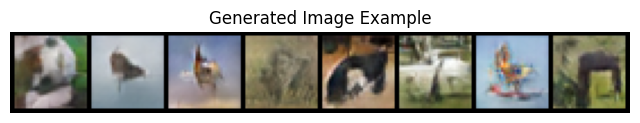

Epoch [290/300]: 100%|██████████| 391/391 [00:09<00:00, 39.29it/s, lossD=0.37, lossG=0.0231] 


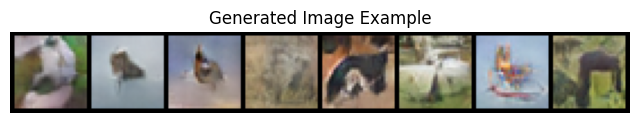

Epoch [300/300]: 100%|██████████| 391/391 [00:09<00:00, 41.35it/s, lossD=0.362, lossG=0.0177]


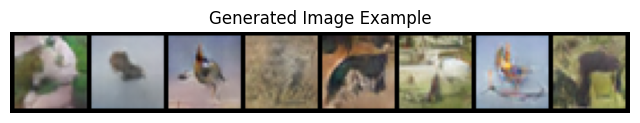

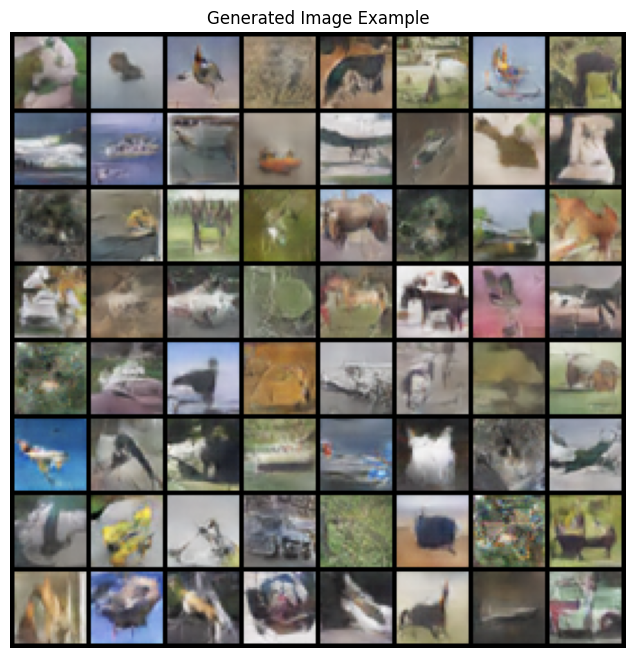

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# ========================
# Generator
# ========================
class Generator(nn.Module):
    def __init__(self, z_dim=100, img_channels=3, feature_g=64):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(z_dim, feature_g*4, 4, 1, 0, bias=False),  # 4x4
            nn.BatchNorm2d(feature_g*4),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g*4, feature_g*2, 4, 2, 1, bias=False), # 8x8
            nn.BatchNorm2d(feature_g*2),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g*2, feature_g, 4, 2, 1, bias=False), # 16x16
            nn.BatchNorm2d(feature_g),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g, img_channels, 4, 2, 1, bias=False), # 32x32
            nn.Tanh()
        )

    def forward(self, x):
        return self.net(x)

# ========================
# Discriminator
# ========================
class Discriminator(nn.Module):
    def __init__(self, img_channels=3, feature_d=64):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(img_channels, feature_d, 4, 2, 1, bias=False),   # 16x16
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d, feature_d*2, 4, 2, 1, bias=False),    # 8x8
            nn.BatchNorm2d(feature_d*2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d*2, feature_d*4, 4, 2, 1, bias=False),  # 4x4
            nn.BatchNorm2d(feature_d*4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d*4, 1, 4, 1, 0, bias=False),            # 1x1
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x).view(-1, 1)

# ========================
# DCGAN Class
# ========================
class DCGAN:
    def __init__(self, z_dim=100, lrG=0.0002, lrD=0.00009, beta1=0.5, device=None):
        self.device = device or torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.z_dim = z_dim

        # Models
        self.G = Generator(z_dim=z_dim).to(self.device)
        self.D = Discriminator().to(self.device)

        # Loss
        self.criterion = nn.BCELoss()

        # Optimizers
        self.optimizerD = optim.Adam(self.D.parameters(), lr=lrD, betas=(beta1, 0.999))
        self.optimizerG = optim.Adam(self.G.parameters(), lr=lrG, betas=(beta1, 0.999))

        # Fixed noise for visualization
        self.fixed_noise = torch.randn(64, z_dim, 1, 1, device=self.device)

        # Folder
        os.makedirs("generated_images", exist_ok=True)

    # ========================
    # Show Images
    # ========================
    def show_generated_images(self, full_predict=True):
        with torch.no_grad():
            fake_images = self.G(self.fixed_noise).detach().cpu()
            if not full_predict:
                fake_images = fake_images[:8]
        grid = vutils.make_grid(fake_images, padding=2, normalize=True, nrow=8)
        plt.figure(figsize=(8,8))
        plt.title("Generated Image Example")
        plt.axis("off")
        plt.imshow(grid.permute(1, 2, 0))
        plt.show()

    # ========================
    # Training
    # ========================
    def train(self, dataset, num_epochs=5, batch_size=128):
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

        for epoch in range(num_epochs):
            loop = tqdm(dataloader, desc=f"Epoch [{epoch+1}/{num_epochs}]")
            total_loss_D = total_loss_G = count = 0

            for i, (real_images, _) in enumerate(loop):
                real_images = real_images.to(self.device)
                b_size = real_images.size(0)

                # ========================
                # Labels dengan smoothing
                # ========================
                real_labels_ori = torch.ones(b_size, 1, device=self.device)
                real_labels = real_labels_ori * 0.9
                fake_labels = torch.zeros(b_size, 1, device=self.device)

                # ========================
                # Noise injection ke D
                # ========================
                real_images = real_images + 0.01*torch.randn_like(real_images)

                # ========================
                # Update Discriminator
                # ========================
                self.D.zero_grad()

                output_real = self.D(real_images)
                lossD_real = self.criterion(output_real, real_labels)

                noise = torch.randn(b_size, self.z_dim, 1, 1, device=self.device)
                fake_images = self.G(noise)
                fake_images_noisy = fake_images + 0.01*torch.randn_like(fake_images)
                output_fake = self.D(fake_images_noisy.detach())
                lossD_fake = self.criterion(output_fake, fake_labels)

                lossD = lossD_real + lossD_fake
                lossD.backward()
                self.optimizerD.step()

                # ========================
                # Update Generator
                # ========================
                self.G.zero_grad()
                output = self.D(fake_images)
                lossG = self.criterion(output, real_labels_ori)
                lossG.backward(retain_graph=True)
                self.optimizerG.step()

                total_loss_D += lossD.item()
                total_loss_G += lossG.item()
                count += 1
                loop.set_postfix(lossD=total_loss_D/count, lossG=total_loss_G/count)

            # Save images per epoch
            with torch.no_grad():
                fake = self.G(self.fixed_noise).detach().cpu()
            vutils.save_image(fake, f"generated_images/epoch_{epoch+1}.png", normalize=True, nrow=8)
            if (epoch+1) % 10 == 0 or epoch == 0:
                self.show_generated_images(full_predict=False)

        self.show_generated_images(full_predict=True)

# ========================
# Dataset
# ========================
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

# ========================
# Train DCGAN
# ========================
dcgan = DCGAN()
dcgan.train(dataset, num_epochs=300, batch_size=128)